# CSC 578 Week 6 (10/17): Hyperparameter tuning with Basic classification

CSC 578 
Hithesh Shanmugam
Assignment 4 



In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [6]:
print ("train: {}, {}".format(str(train_images.shape), str(train_labels.shape)))
print ("test: {}, {}".format(str(test_images.shape), str(test_labels.shape)))

train: (60000, 28, 28), (60000,)
test: (10000, 28, 28), (10000,)


## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),       
    tf.keras.layers.Dense(10)
])

In [8]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [9]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', 
           kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', 
           kernel_regularizer=tf.keras.regularizers.L1(1e-5)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', 
           kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dense(128, activation='relu', 
           kernel_regularizer=tf.keras.regularizers.L1(1e-5)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, #'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
opt1 = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=opt1, #'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
opt2 = tf.keras.optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=opt2, #'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
opt3 = tf.keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt3, #'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
opt4 = tf.keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=opt4, #'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
opt5 = tf.keras.optimizers.Adam(learning_rate=0.001)
model5.compile(optimizer=opt5, #'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
opt6 = tf.keras.optimizers.Adam(learning_rate=0.001)
model6.compile(optimizer=opt6, #'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
opt7 = tf.keras.optimizers.Adam(learning_rate=0.001)
model7.compile(optimizer=opt7, #'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:


In [23]:
# With validation set (10%) -- using the 'validation_split' parameter in fit()
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.7199 - accuracy: 0.7700 - val_loss: 0.5202 - val_accuracy: 0.8258
Epoch 2/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4880 - accuracy: 0.8374 - val_loss: 0.4577 - val_accuracy: 0.8420
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4430 - accuracy: 0.8490 - val_loss: 0.4234 - val_accuracy: 0.8528
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4153 - accuracy: 0.8583 - val_loss: 0.4110 - val_accuracy: 0.8587
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3963 - accuracy: 0.8647 - val_loss: 0.4006 - val_accuracy: 0.8615
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3809 - accuracy: 0.8679 - val_loss: 0.3907 - val_accuracy: 0.8625
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3698 - accuracy: 0.8713 - val_loss: 0.3827 - val_accuracy:

In [24]:
history1 = model1.fit(train_images, train_labels, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.7267 - accuracy: 0.7704 - val_loss: 0.5094 - val_accuracy: 0.8268
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4716 - accuracy: 0.8369 - val_loss: 0.4505 - val_accuracy: 0.8383
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4288 - accuracy: 0.8514 - val_loss: 0.4224 - val_accuracy: 0.8497
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4031 - accuracy: 0.8597 - val_loss: 0.4185 - val_accuracy: 0.8473
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3842 - accuracy: 0.8656 - val_loss: 0.3864 - val_accuracy: 0.8623
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3694 - accuracy: 0.8712 - val_loss: 0.3727 - val_accuracy: 0.8683
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3567 - accuracy: 0.8744 - val_loss: 0.3705 - val_accuracy:

In [30]:
history2 = model2.fit(train_images, train_labels, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5438 - accuracy: 0.8047 - val_loss: 0.4554 - val_accuracy: 0.8458
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4375 - accuracy: 0.8440 - val_loss: 0.4346 - val_accuracy: 0.8503
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4066 - accuracy: 0.8545 - val_loss: 0.4383 - val_accuracy: 0.8505
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3956 - accuracy: 0.8571 - val_loss: 0.4201 - val_accuracy: 0.8415
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3870 - accuracy: 0.8634 - val_loss: 0.4244 - val_accuracy: 0.8508
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3740 - accuracy: 0.8663 - val_loss: 0.3973 - val_accuracy: 0.8653
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3736 - accuracy: 0.8682 - val_loss: 0.3999 - val_accuracy:

In [32]:
history3= model3.fit(train_images, train_labels, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5267 - accuracy: 0.8135 - val_loss: 0.3903 - val_accuracy: 0.8613
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3800 - accuracy: 0.8622 - val_loss: 0.3700 - val_accuracy: 0.8663
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3390 - accuracy: 0.8759 - val_loss: 0.3736 - val_accuracy: 0.8603
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3135 - accuracy: 0.8844 - val_loss: 0.3545 - val_accuracy: 0.8748
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2994 - accuracy: 0.8893 - val_loss: 0.3554 - val_accuracy: 0.8730
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2824 - accuracy: 0.8964 - val_loss: 0.3338 - val_accuracy: 0.8832
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2716 - accuracy: 0.8992 - val_loss: 0.3346 - val_accuracy:

In [33]:
history4 = model4.fit(train_images, train_labels, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5837 - accuracy: 0.8162 - val_loss: 0.4954 - val_accuracy: 0.8365
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4496 - accuracy: 0.8599 - val_loss: 0.4507 - val_accuracy: 0.8553
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4184 - accuracy: 0.8685 - val_loss: 0.4407 - val_accuracy: 0.8605
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3988 - accuracy: 0.8766 - val_loss: 0.4028 - val_accuracy: 0.8720
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3842 - accuracy: 0.8827 - val_loss: 0.4037 - val_accuracy: 0.8798
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3755 - accuracy: 0.8851 - val_loss: 0.4046 - val_accuracy: 0.8780
Epoch 7/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3652 - accuracy: 0.8901 - val_loss: 0.4042 - val_accuracy:

In [34]:
history5 = model5.fit(train_images, train_labels, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5603 - accuracy: 0.8143 - val_loss: 0.4639 - val_accuracy: 0.8388
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4249 - accuracy: 0.8606 - val_loss: 0.4197 - val_accuracy: 0.8655
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3888 - accuracy: 0.8732 - val_loss: 0.4324 - val_accuracy: 0.8620
Epoch 4/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3658 - accuracy: 0.8804 - val_loss: 0.3837 - val_accuracy: 0.8793
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3519 - accuracy: 0.8869 - val_loss: 0.3816 - val_accuracy: 0.8777
Epoch 6/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3416 - accuracy: 0.8910 - val_loss: 0.3779 - val_accuracy: 0.8797
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3299 - accuracy: 0.8953 - val_loss: 0.3798 - val_accuracy:

In [35]:
history6 = model6.fit(train_images, train_labels, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5892 - accuracy: 0.7866 - val_loss: 0.4115 - val_accuracy: 0.8440
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4344 - accuracy: 0.8410 - val_loss: 0.3752 - val_accuracy: 0.8632
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3997 - accuracy: 0.8532 - val_loss: 0.3587 - val_accuracy: 0.8678
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3779 - accuracy: 0.8611 - val_loss: 0.3525 - val_accuracy: 0.8710
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3618 - accuracy: 0.8669 - val_loss: 0.3330 - val_accuracy: 0.8765
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3509 - accuracy: 0.8719 - val_loss: 0.3304 - val_accuracy: 0.8803
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3386 - accuracy: 0.8746 - val_loss: 0.3464 - val_accuracy:

In [36]:
history7 = model7.fit(train_images, train_labels, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 10s 5ms/step - loss: 0.6213 - accuracy: 0.8016 - val_loss: 0.4823 - val_accuracy: 0.8395
Epoch 2/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4781 - accuracy: 0.8500 - val_loss: 0.4451 - val_accuracy: 0.8622
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4461 - accuracy: 0.8626 - val_loss: 0.4260 - val_accuracy: 0.8703
Epoch 4/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.4179 - accuracy: 0.8721 - val_loss: 0.4349 - val_accuracy: 0.8700
Epoch 5/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4081 - accuracy: 0.8742 - val_loss: 0.4138 - val_accuracy: 0.8735
Epoch 6/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3978 - accuracy: 0.8782 - val_loss: 0.4138 - val_accuracy: 0.8683
Epoch 7/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3864 - accuracy: 0.8827 - val_loss: 0.4127 - val_accuracy

In [25]:
history_dict = history.history

print (history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
history_dict1 = history1.history

print (history_dict1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [31]:
history_dict2 = history2.history

print (history_dict1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [37]:
history_dict3 = history3.history

print (history_dict1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [38]:
history_dict4 = history4.history

print (history_dict1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [39]:
history_dict5 = history5.history

print (history_dict1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [40]:
history_dict6 = history6.history

print (history_dict1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [41]:
history_dict7 = history7.history

print (history_dict1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


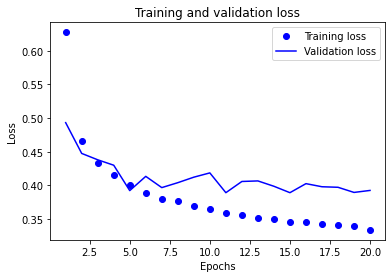

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

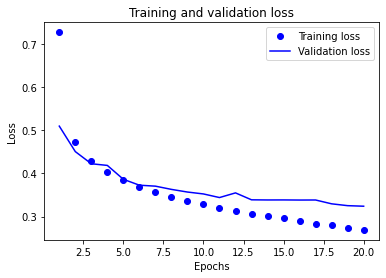

In [43]:
acc1 = history_dict1['accuracy']
val_acc1 = history_dict1['val_accuracy']
loss1 = history_dict1['loss']
val_loss1 = history_dict1['val_loss']

epochs = range(1, len(acc1) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss1, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

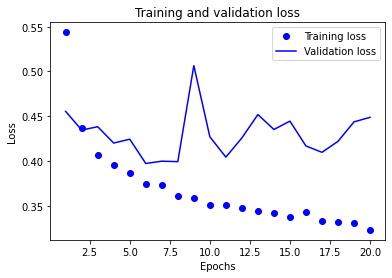

In [45]:
acc2 = history_dict2['accuracy']
val_acc2 = history_dict2['val_accuracy']
loss2 = history_dict2['loss']
val_loss2 = history_dict2['val_loss']

epochs = range(1, len(acc2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

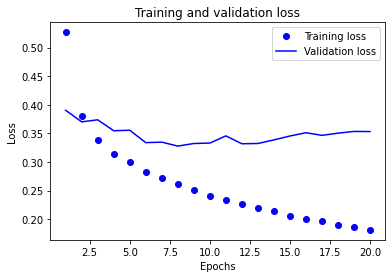

In [46]:
acc3 = history_dict3['accuracy']
val_acc3 = history_dict3['val_accuracy']
loss3 = history_dict3['loss']
val_loss3 = history_dict3['val_loss']

epochs = range(1, len(acc3) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss3, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

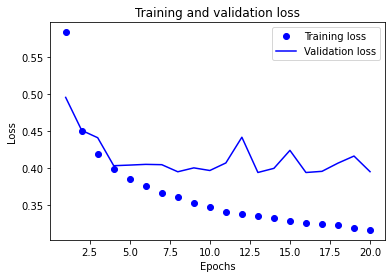

In [47]:
acc4 = history_dict4['accuracy']
val_acc4 = history_dict4['val_accuracy']
loss4 = history_dict4['loss']
val_loss4 = history_dict4['val_loss']

epochs = range(1, len(acc4) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss4, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

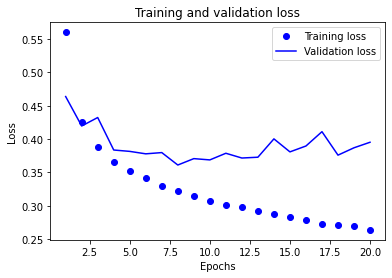

In [49]:
acc5 = history_dict['accuracy']
val_acc5 = history_dict5['val_accuracy']
loss5 = history_dict5['loss']
val_loss5 = history_dict5['val_loss']

epochs = range(1, len(acc5) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss5, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

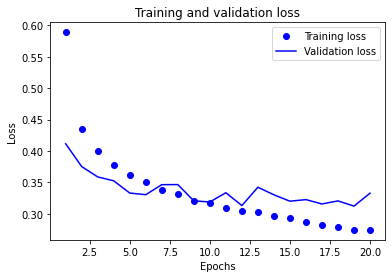

In [50]:
acc6 = history_dict6['accuracy']
val_acc6 = history_dict6['val_accuracy']
loss6 = history_dict6['loss']
val_loss6 = history_dict6['val_loss']

epochs = range(1, len(acc6) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss6, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

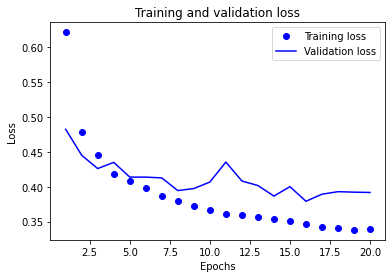

In [51]:
acc7 = history_dict7['accuracy']
val_acc7 = history_dict7['val_accuracy']
loss7 = history_dict7['loss']
val_loss7 = history_dict7['val_loss']

epochs = range(1, len(acc7) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss7, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss7, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

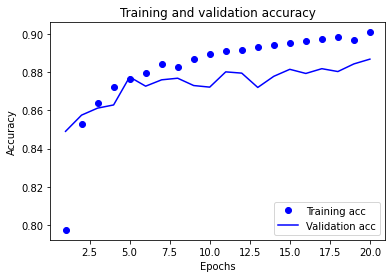

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

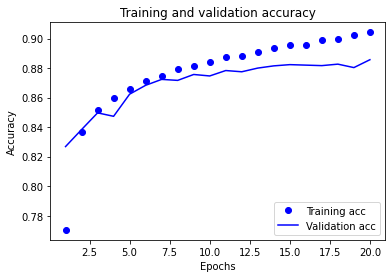

In [52]:
plt.plot(epochs, acc1, 'bo', label='Training acc')
plt.plot(epochs, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

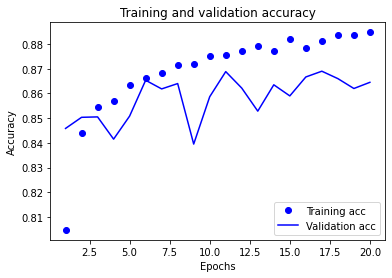

In [53]:
plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

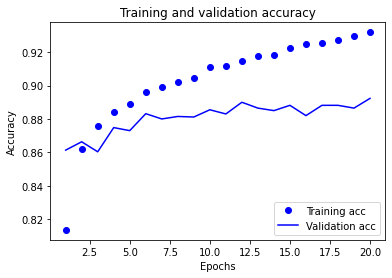

In [54]:
plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

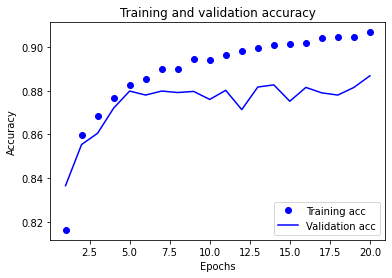

In [55]:
plt.plot(epochs, acc4, 'bo', label='Training acc')
plt.plot(epochs, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

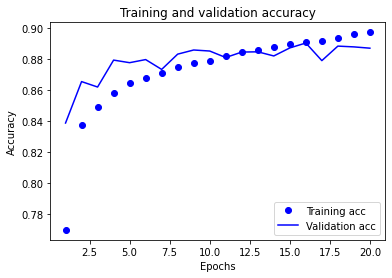

In [56]:
plt.plot(epochs, acc5, 'bo', label='Training acc')
plt.plot(epochs, val_acc5, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

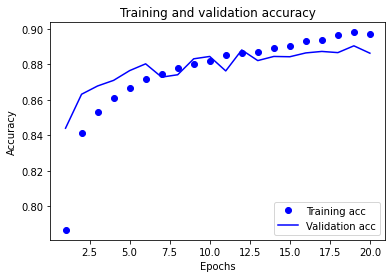

In [57]:
plt.plot(epochs, acc6, 'bo', label='Training acc')
plt.plot(epochs, val_acc6, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

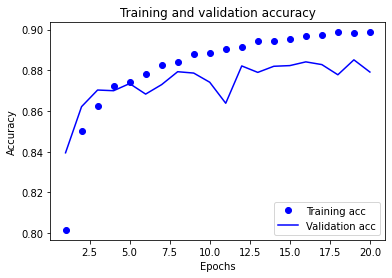

In [58]:
plt.plot(epochs, acc7, 'bo', label='Training acc')
plt.plot(epochs, val_acc7, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', test_acc, "Test_loss:", test_loss)

print('\nTrain accuracy:', train_acc , "Train_loss:", train_loss)

313/313 - 1s - loss: 0.4217 - accuracy: 0.8783 - 648ms/epoch - 2ms/step
1875/1875 - 4s - loss: 0.3138 - accuracy: 0.9086 - 4s/epoch - 2ms/step

Test accuracy: 0.8783000111579895 Test_loss: 0.421709805727005

Train accuracy: 0.9085500240325928 Train_loss: 0.31380176544189453


In [59]:
test_loss1, test_acc1 = model1.evaluate(test_images,  test_labels, verbose=2)
train_loss1, train_acc1 = model1.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', test_acc1, "Test_loss:", test_loss1)

print('\nTrain accuracy:', train_acc1 , "Train_loss:", train_loss1)

313/313 - 1s - loss: 0.3469 - accuracy: 0.8767 - 533ms/epoch - 2ms/step
1875/1875 - 3s - loss: 0.2647 - accuracy: 0.9060 - 3s/epoch - 2ms/step

Test accuracy: 0.8766999840736389 Test_loss: 0.34691527485847473

Train accuracy: 0.9059666395187378 Train_loss: 0.2646951377391815


In [60]:
test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)
train_loss2, train_acc2 = model2.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', test_acc2, "Test_loss:", test_loss2)

print('\nTrain accuracy:', train_acc2 , "Train_loss:", train_loss2)

313/313 - 1s - loss: 0.4801 - accuracy: 0.8532 - 529ms/epoch - 2ms/step
1875/1875 - 3s - loss: 0.3401 - accuracy: 0.8813 - 3s/epoch - 2ms/step

Test accuracy: 0.8532000184059143 Test_loss: 0.48012471199035645

Train accuracy: 0.8813333511352539 Train_loss: 0.340126633644104


In [61]:
test_loss3, test_acc3 = model3.evaluate(test_images,  test_labels, verbose=2)
train_loss3, train_acc3 = model3.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', test_acc3, "Test_loss:", test_loss3)

print('\nTrain accuracy:', train_acc3 , "Train_loss:", train_loss3)

313/313 - 1s - loss: 0.3650 - accuracy: 0.8836 - 552ms/epoch - 2ms/step
1875/1875 - 3s - loss: 0.1886 - accuracy: 0.9318 - 3s/epoch - 2ms/step

Test accuracy: 0.8835999965667725 Test_loss: 0.3649815320968628

Train accuracy: 0.9317833185195923 Train_loss: 0.18859152495861053


In [62]:
test_loss4, test_acc4 = model4.evaluate(test_images,  test_labels, verbose=2)
train_loss4, train_acc4 = model4.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', test_acc4, "Test_loss:", test_loss4)

print('\nTrain accuracy:', train_acc4 , "Train_loss:", train_loss4)

313/313 - 1s - loss: 0.4171 - accuracy: 0.8788 - 661ms/epoch - 2ms/step
1875/1875 - 4s - loss: 0.3105 - accuracy: 0.9099 - 4s/epoch - 2ms/step

Test accuracy: 0.8787999749183655 Test_loss: 0.417147696018219

Train accuracy: 0.909850001335144 Train_loss: 0.3105359375476837


In [63]:
test_loss5, test_acc5 = model5.evaluate(test_images,  test_labels, verbose=2)
train_loss5, train_acc5 = model5.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', test_acc5, "Test_loss:", test_loss5)

print('\nTrain accuracy:', train_acc5 , "Train_loss:", train_loss5)

313/313 - 1s - loss: 0.4069 - accuracy: 0.8827 - 612ms/epoch - 2ms/step
1875/1875 - 4s - loss: 0.2706 - accuracy: 0.9215 - 4s/epoch - 2ms/step

Test accuracy: 0.8827000260353088 Test_loss: 0.40689796209335327

Train accuracy: 0.921500027179718 Train_loss: 0.2706303298473358


In [64]:
test_loss6, test_acc6 = model6.evaluate(test_images,  test_labels, verbose=2)
train_loss6, train_acc6 = model6.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', test_acc6, "Test_loss:", test_loss6)

print('\nTrain accuracy:', train_acc6 , "Train_loss:", train_loss6)

313/313 - 1s - loss: 0.3533 - accuracy: 0.8796 - 537ms/epoch - 2ms/step
1875/1875 - 3s - loss: 0.2453 - accuracy: 0.9078 - 3s/epoch - 2ms/step

Test accuracy: 0.8795999884605408 Test_loss: 0.35334551334381104

Train accuracy: 0.9077833294868469 Train_loss: 0.24534142017364502


In [65]:
test_loss7, test_acc7 = model7.evaluate(test_images,  test_labels, verbose=2)
train_loss7, train_acc7 = model7.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', test_acc7, "Test_loss:", test_loss7)

print('\nTrain accuracy:', train_acc7 , "Train_loss:", train_loss7)

313/313 - 1s - loss: 0.4080 - accuracy: 0.8800 - 657ms/epoch - 2ms/step
1875/1875 - 4s - loss: 0.3187 - accuracy: 0.9087 - 4s/epoch - 2ms/step

Test accuracy: 0.8799999952316284 Test_loss: 0.4079848527908325

Train accuracy: 0.9086666703224182 Train_loss: 0.31865033507347107


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [66]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [67]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [68]:
pred_indices = np.array([np.argmax(pred) for pred in predictions])
print (pred_indices)
print (test_labels)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [69]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_indices, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.86      0.82      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.74      0.82      0.78      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.78      0.80      0.79      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.72      0.60      0.66      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [70]:
predictions = probability_model.predict(train_images)
pred_indices = np.array([np.argmax(pred) for pred in predictions])
print (pred_indices)
print (train_labels)

print(classification_report(train_labels, pred_indices, target_names=class_names))

1875/1875 [==============================] - 4s 2ms/step
[9 0 0 ... 3 0 5]
[9 0 0 ... 3 0 5]
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.91      0.85      6000
     Trouser       0.99      0.98      0.98      6000
    Pullover       0.79      0.86      0.82      6000
       Dress       0.93      0.87      0.90      6000
        Coat       0.81      0.84      0.83      6000
      Sandal       0.97      0.97      0.97      6000
       Shirt       0.79      0.67      0.72      6000
     Sneaker       0.94      0.96      0.95      6000
         Bag       0.98      0.97      0.97      6000
  Ankle boot       0.97      0.96      0.97      6000

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000

